## Autocorrelation and partial autocorrelation plots

---

### 👉🏼 <span style="background: orange;">visual way to show serial correlation in data that changes over time (i.e. time series data). </span> 

---

### first:  📖 Recap Statistical correlation :
- the strengh of the statistical **relationship** between two variables = correlation

Variable within a dataset can be related for lots of reasons, e.g.:
- one variable could cause or depend on the values of another variable
- one variable could be lightly associated with another variable
- two variables could depend on a third unknown variable

a correlation could be **positive, negative or neutral**:
- positive: both variables change in the same direction
- neutral: no relationship in the change of the variables
- negative: variables change in opposite direction

> The performance of some algorithms can **deteriorate** if two or more variables are **tightly related**, called **multicollinearity**. An example is linear regression, where one of the offending correlated variables should be **removed** in order to improve the skill of the model.

---

### Example tutorial/ dataset:
tutorial from: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/


The dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia

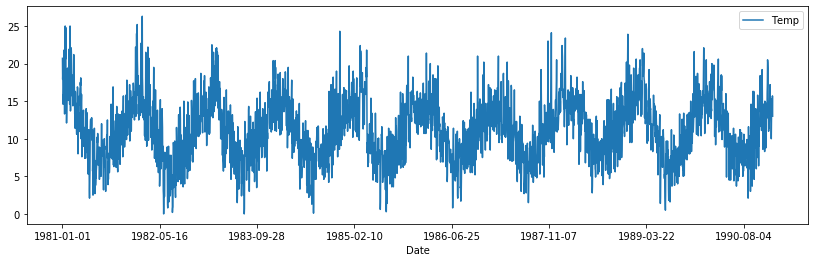

In [1]:
# create a line plot of the time series:
from pandas import read_csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 4]

temp_series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
temp_series.plot()

---

###  Autocorrelation
- we can calculate the correlation for time series observations with the observations of previous time steps, called **lags**

👉🏼 because the correlation of the time series observations is calculated with values of the same series at previous times, it is called a <span style="background: orange;">**serial correlation, or autocorrelation**</span>  🤓


- a plot of the autocorrelation of a time series by lag is called the <span style="background: orange;">**A**uto**C**orrelation**F**unction (ACF)</span> (*other terms: correlogram, autocorrelation plot*) 

### 1.  How do I plot and review the autocorrelation function for a time series?

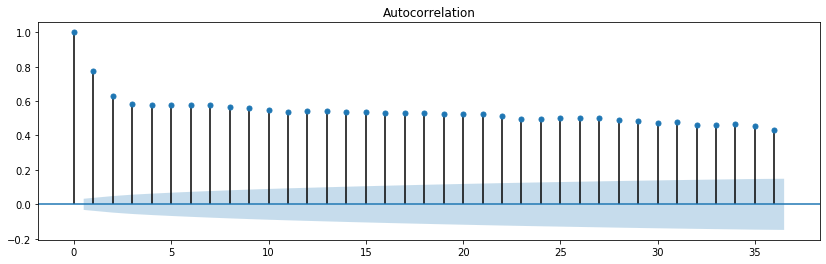

In [2]:
# calculating and plotting the autocorrelation plot for the Minimum Daily
# Temperatures using the plot_acf() function from the statsmodel library

from statsmodels.graphics.tsaplots import plot_acf
acf_min_daily_temp = plot_acf(temp_series, lags=None) 
# lags default = np.arange(len(corr))

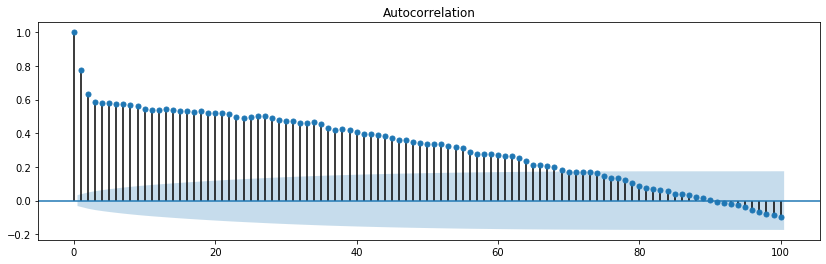

In [3]:
acf_min_daily_temp2 = plot_acf(temp_series, lags=100)

**we get a plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1**

- confidence intervals are drawn as a cone

- by default, this is set to a 95% confidence interval: correlation values outside of this cone are very likely a correlation and NOT a statistical fluke

---

### 2. How do I plot and review the partial autocorrelation function for a time series?

### Partial Autocorrelation Function


👉🏼 partial autocorrelation = a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed

> *the partial autocorrelatoin at lag k is the correlation that results after removing the effect of any correlation due to the terms at shorter lags*

*The partial autocorrelation function is a measure of the correlation between observations of a time series that are separated by k time units (yt and yt–k), after adjusting for the presence of all the other terms of shorter lag (yt–1, yt–2, ..., yt–k–1).*

- the autocorrelation for an observation at a prior time step is comprised of
 1. the direct correlation
 2. indirect correlations (*which are a linear function of the correlation of the observation, with observations at intervening time steps*
 
**the partial autocorrelation function** seeks to **remove these indirect correlations**

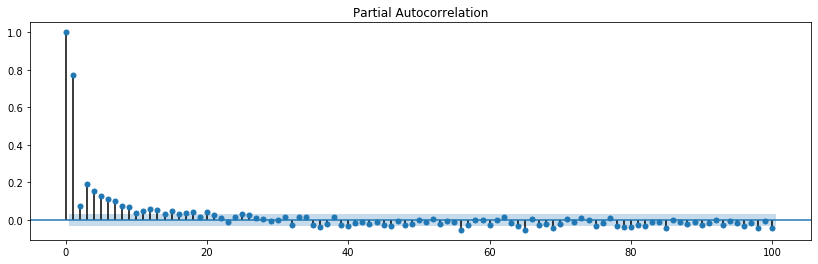

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf_min_daily_temp = plot_pacf(temp_series, lags=100)

---

### 3. What is the difference between autocorrelation and partial autocorrelation functions for time series analysis?

- plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story

### Autoregression Intuition
- consider a time series that was generated by an autoregression (AR) process with a lag of *k*

    - *AR(1) autoregressive process is one in which the current value is based on the immediately preceding value*
    - *AR(2) process is one in which the current value is based on the previous two values*


- now we know: the ACF describes the autocorrelation between an observation and another observation at a prior time step that **includes direct and indirect dependence information**

-> we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened

#### this is exactly the expecation of the ACF plot for an AR(k) process

<img src="autocorr_plot.gif" width="400" height="500">

*the plot starts with a high autocorrelation at lag 1 that slowly declines. It continues decreasing until it becomes negative and starts showing an increasing negative autocorrelation. (The decreasing autocorrelation is generally linear with little noise). Such a pattern is the autocorrelation plot signature of "strong autocorrelation", which in turn provides high predictability if modeled properly.*

---

- we know now that the PACF only describes the direct relationship between an observation and its lag
-> we would expect that there would be no correlation for lag values beyond *k*

#### this is exactly the expecation of the PACF plot for an AR(k) process

<img src="partial_autocorr.png" width="300" height="400">

---

### What's important after all?
### ACF plot for random data:

<img src="acf_plot_random.gif" width="400" height="400">

*With the exception of lag 0, which is always 1 by definition, almost all of the autocorrelations fall within the 95% confidence limits. In addition, there is no apparent pattern (such as the first twenty-five being positive and the second twenty-five being negative). This is the abscence of a pattern we expect to see if the data are in fact random.* 

### Not Random:

A **DATA** plot showing 100 random numbers...

<img src="auto_sinus_detect.png" width="400" height="600">

 ... with a "hidden" sine function visible in the ACF plot of the series

---

#  <span style="background: orange;">plot_acf = "more useful than the heatmap for time series data" </span>   🤓